In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
audi_cars = pd.read_csv("data/audi_cars_data.csv")
list(audi_cars.columns)
audi_cars.head()

,Price,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type
0,5900.0,Used,Audi,100,2.0 E,C4 (1991-1994),1992,262000.0,101.0,1984.0,Gasoline
1,6900.0,Used,Audi,100,Avant 2.8 E,C4 (1991-1994),1991,332000.0,174.0,2771.0,Gasoline + LPG
2,5000.0,Used,Audi,100,Avant 2.6 E,C4 (1991-1994),1993,500000.0,150.0,2598.0,Gasoline
3,19900.0,Used,Audi,100,NaN,C1 (1968-1976),1974,99000.0,115.0,1900.0,Gasoline
4,14999.0,Used,Audi,100,Avant 2.2,C3 (1982-1991),1987,108729.0,137.0,2226.0,Gasoline


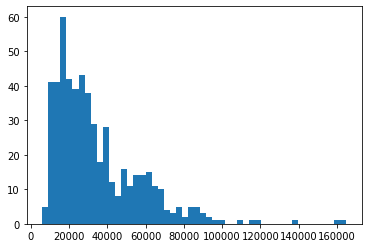

In [4]:
audi_a3_cars = audi_cars[audi_cars["Vehicle_model"] == 'A3']
audi_a3_2010 = audi_a3_cars[audi_a3_cars["Production_year"] == 2010]
audi_a3_2000ccm = audi_a3_cars[audi_a3_cars["Displacement_cm3"] >= 1950]
audi_a3_2000ccm = audi_a3_2000ccm[audi_a3_2000ccm["Displacement_cm3"] <= 2050]
audi_a3_2000ccm = audi_a3_2000ccm.dropna()
np.std(audi_a3_2000ccm["Price"])
plt.figure()
plt.hist(audi_a3_2000ccm["Price"], bins = 50)
plt.show()

In [5]:
import pandas as pd
import cmdstanpy


model = cmdstanpy.CmdStanModel(stan_file='car_price_1_ppc.stan')

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:cmdstanpy:found newer exe file, not recompiling


In [6]:

N = 532
data = {'N': N,
        'x1_new': np.array([np.random.normal(200000, 70000) for _ in range(N)]),
        'x2_new': np.array([np.random.normal(2009, 4) for _ in range(N)])
        }
sim=model.sample(data=data)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [7]:
sim_pd = sim.draws_pd()
prices_sim_pd = sim_pd.loc[:, 'y_generated[1]':'y_generated[523]'].values
sim_pd.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta1,beta2,...,y_generated[523],y_generated[524],y_generated[525],y_generated[526],y_generated[527],y_generated[528],y_generated[529],y_generated[530],y_generated[531],y_generated[532]
0,14.4044,0.972616,0.610829,3.0,7.0,0.0,-13.3873,34397.3,-0.180470,20.2703,...,21337.7,33267.3,25718.6,31034.8,18919.7,26665.4,43342.4,80387.7,29198.2,38051.8
1,14.9634,0.643801,0.610829,2.0,3.0,0.0,-12.4713,34890.4,-0.168584,18.8772,...,22572.0,33715.5,26665.5,31634.0,20318.1,27551.6,43131.2,77731.8,29918.3,38190.2
2,14.8707,0.951298,0.610829,3.0,7.0,0.0,-14.3067,35144.1,-0.172258,22.0345,...,28096.9,39468.1,32241.4,37338.0,25773.1,33183.0,49068.5,84440.8,35563.5,44019.9
3,14.5325,0.982215,0.610829,2.0,3.0,0.0,-14.3605,34501.0,-0.181907,19.0911,...,18634.8,30665.0,23068.9,28418.4,16205.3,24001.9,40829.5,78158.7,26574.0,35496.7
4,13.1760,0.921054,0.610829,2.0,3.0,0.0,-12.5453,33733.4,-0.175371,24.3684,...,30458.0,42025.5,34653.6,39862.4,28086.5,35643.5,51792.1,87814.3,38036.7,46651.2


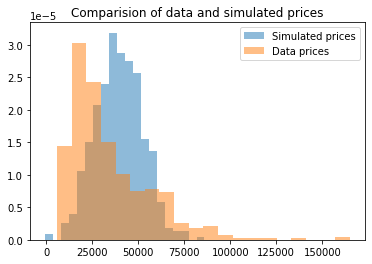

In [8]:
plt.figure()

plt.hist(prices_sim_pd[0], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()

In [9]:
data = {
    'N': len(audi_a3_2000ccm),
    'x1': audi_a3_2000ccm['Mileage_km'].values,
    'x2': audi_a3_2000ccm['Production_year'].values,
    'y': audi_a3_2000ccm['Price'].values
}

model_fit = cmdstanpy.CmdStanModel(stan_file='car_price_1_fit.stan')
fit = model_fit.sample(data=data, chains=4, iter_warmup=1000, iter_sampling=2000)


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▋         | 00:00 Iteration:    1 / 3000 [  0%]  (Warmup)

chain 1 |█▎        | 00:01 Iteration:  200 / 3000 [  6%]  (Warmup)
chain 1 |█▌        | 00:03 Iteration:  300 / 3000 [ 10%]  (Warmup)




chain 1 |█▉        | 00:03 Iteration:  400 / 3000 [ 13%]  (Warmup)

chain 1 |██▌       | 00:03 Iteration:  600 / 3000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:03 Iteration:  800 / 3000 [ 26%]  (Warmup)

chain 1 |███▍      | 00:04 Iteration:  900 / 3000 [ 30%]  (Warmup)

chain 1 |████▍     | 00:05 Iteration: 1100 / 3000 [ 36%]  (Sampling)
chain 1 |█████     | 00:05 Iteration: 1300 / 3000 [ 43%]  (Sampling)

chain 1 |███████▊  | 00:08 Iteration: 2200 / 3000 [ 73%]  (Sampling)


chain 1 |██████████| 00:10 Iteration: 2900 / 3000 [ 96%]  (Sampling)
























































chain 1 |██████████| 01:08 Sampling completed          


INFO:cmdstanpy:CmdStan done processing.


In [62]:
fit_pd = fit.draws_pd()
fit_pd

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta1,beta2,...,y_generated[523],y_generated[524],y_generated[525],y_generated[526],y_generated[527],y_generated[528],y_generated[529],y_generated[530],y_generated[531],y_generated[532]
0,-41416.8,0.999656,0.048921,6.0,95.0,0.0,41418.0,30787.3,-0.218561,23.6551,...,37603.6,52815.5,49921.1,36589.6,45224.4,22937.2,43972.9,68877.6,41994.8,43928.5
1,-41417.5,0.957649,0.048921,5.0,31.0,0.0,41418.4,30387.1,-0.219681,23.9411,...,36194.4,52552.8,54085.9,40621.9,45030.3,22732.0,40448.7,69081.3,40788.4,41991.4
2,-41418.1,0.999888,0.048921,5.0,31.0,0.0,41419.0,30089.6,-0.218160,23.9668,...,32433.6,53800.7,55184.9,38289.5,41635.8,28169.8,42722.9,66944.2,41657.4,46564.5
3,-41416.7,0.998962,0.048921,5.0,63.0,0.0,41418.9,32383.3,-0.221235,23.1349,...,34847.2,50817.6,50382.9,38162.9,46904.5,22431.3,46363.1,71953.8,39252.5,47881.4
4,-41419.3,0.478027,0.048921,2.0,3.0,0.0,41420.7,32259.1,-0.221537,23.1391,...,36411.1,50160.9,52776.8,40320.0,42057.5,29010.1,41431.3,68870.1,39298.9,44414.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-41418.7,0.680125,0.001662,6.0,91.0,0.0,41420.3,31968.7,-0.218504,23.1665,...,34325.8,50324.4,51502.6,40179.1,45285.2,27584.7,45210.3,68467.7,39409.4,43397.2
7996,-41416.6,0.999615,0.001662,4.0,31.0,0.0,41418.8,31744.0,-0.218540,23.1307,...,36453.5,52819.3,49799.1,39853.5,46445.3,24291.0,44733.8,70238.1,37562.6,48186.1
7997,-41416.3,0.970028,0.001662,6.0,123.0,0.0,41417.4,31495.9,-0.218481,23.3311,...,34510.8,51242.4,55612.7,39033.3,43865.4,26732.7,43669.2,71620.9,37695.4,45906.7
7998,-41416.0,0.999819,0.001662,9.0,879.0,0.0,41416.6,32818.3,-0.219380,22.7433,...,33764.1,52105.8,52562.4,42899.7,45451.6,29957.6,46864.6,70289.9,41120.7,42906.3


In [63]:
prices = fit_pd.loc[:, 'y_generated[1]':'y_generated[532]'].values

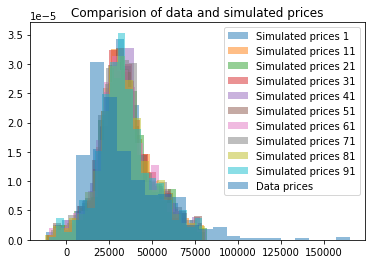

In [12]:
plt.figure()
for i in range(1, 100, 10):
    plt.hist(prices[i], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices {i}')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()

In [68]:
model_2 = cmdstanpy.CmdStanModel(stan_file='car_price_2_ppc.stan')

INFO:cmdstanpy:compiling stan file /home/DA/project/car_price_2_ppc.stan to exe file /home/DA/project/car_price_2_ppc
INFO:cmdstanpy:compiled model executable: /home/DA/project/car_price_2_ppc


In [65]:
N = 532
data = {'N': N,
        'x1_new': np.array([np.random.normal(0, 1) for _ in range(N)]),
        'x2_new': np.array([np.random.normal(0, 1) for _ in range(N)])
        }
sim_2=model_2.sample(data=data)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status




chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [67]:
sim_pd_2 = sim_2.draws_pd()
print(sim_pd_2['lambda'])
prices_sim_pd_2 = sim_pd_2.loc[:, 'y_generated[1]':'y_generated[523]'].values
sim_pd_2.head()

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3995    0.0
3996    0.0
3997    0.0
3998    0.0
3999    0.0
Name: lambda, Length: 4000, dtype: float64


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta1,beta2,...,y_generated[524],y_generated[525],y_generated[526],y_generated[527],y_generated[528],y_generated[529],y_generated[530],y_generated[531],y_generated[532],lambda
0,5.99327,0.933347,0.744368,3.0,7.0,0.0,-4.769240,11.06590,9.45560,9.61734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.17825,0.998971,0.744368,3.0,7.0,0.0,-5.539910,9.16979,10.53980,10.20660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.27006,0.988857,0.744368,3.0,7.0,0.0,-5.583960,10.06640,8.93037,9.87739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.01355,0.674822,0.744368,2.0,3.0,0.0,-0.125929,10.80170,8.73223,12.06280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.67012,1.000000,0.744368,2.0,7.0,0.0,-0.758938,8.77225,10.63910,9.00689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


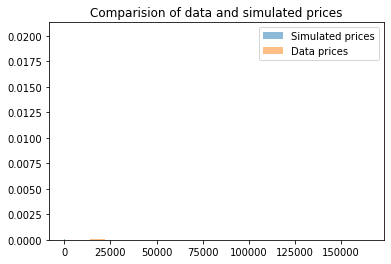

In [61]:
plt.figure()

plt.hist(prices_sim_pd_2[1], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()

In [17]:
data = {
    'N': len(audi_a3_2000ccm),
    'x1_new': audi_a3_2000ccm['Mileage_km'].values,
    'x2_new': audi_a3_2000ccm['Production_year'].values,
}

model_fit_2 = cmdstanpy.CmdStanModel(stan_file='car_price_2_fit.stan')
fit_2 = model_fit_2.sample(data=data, chains=4, iter_warmup=1000, iter_sampling=2000)

INFO:cmdstanpy:compiling stan file /home/DA/project/car_price_2_fit.stan to exe file /home/DA/project/car_price_2_fit
INFO:cmdstanpy:compiled model executable: /home/DA/project/car_price_2_fit
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▎         | 00:00 Status


chain 1 |████      | 00:00 Iteration: 1001 / 3000 [ 33%]  (Sampling)


chain 1 |█████▋    | 00:00 Iteration: 1500 / 3000 [ 50%]  (Sampling)

chain 1 |██████▌   | 00:01 Iteration: 1800 / 3000 [ 60%]  (Sampling)


chain 1 |███████▏  | 00:01 Iteration: 2000 / 3000 [ 66%]  (Sampling)

chain 1 |███████▊  | 00:01 Iteration: 2200 / 3000 [ 73%]  (Sampling)


chain 1 |████████▍ | 00:02 Iteration: 2400 / 3000 [ 80%]  (Sampling)
chain 1 |█████████ | 00:02 Iteration: 2600 / 3000 [ 86%]  (Sampling)


chain 1 |█████████▋| 00:02 Iteration: 2800 / 3000 [ 93%]  (Sampling)







chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed         


INFO:cmdstanpy:CmdStan done processing.


In [18]:
fit_pd_2 = fit_2.draws_pd()
fit_pd_2

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta1,beta2,...,y_generated[524],y_generated[525],y_generated[526],y_generated[527],y_generated[528],y_generated[529],y_generated[530],y_generated[531],y_generated[532],lambda
0,12.59160,1.000000,0.482932,3.0,7.0,0.0,-10.30120,23661.1,-0.179607,21.3167,...,44775.0,45146.0,33723.0,39346.0,23488.0,38353.0,58666.0,34575.0,39514.0,39605.8
1,11.53050,0.976237,0.482932,3.0,7.0,0.0,-10.19420,25651.4,-0.149145,21.3440,...,50461.0,50608.0,41106.0,45790.0,32564.0,45521.0,61943.0,42004.0,46159.0,46222.6
2,9.19693,0.986150,0.482932,3.0,7.0,0.0,-8.18153,25065.5,-0.193832,17.9785,...,37939.0,38017.0,25931.0,31651.0,14696.0,31361.0,52685.0,26520.0,32161.0,32165.0
3,11.89200,0.952153,0.482932,2.0,7.0,0.0,-6.92409,25178.5,-0.180228,17.4775,...,38718.0,38551.0,27184.0,32840.0,17045.0,32564.0,52568.0,27868.0,33278.0,33309.2
4,10.34380,0.946182,0.482932,3.0,7.0,0.0,-9.10780,25501.9,-0.147164,20.7713,...,49718.0,49573.0,40341.0,45230.0,31990.0,44801.0,60524.0,41142.0,45238.0,45214.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,14.62310,0.813413,0.507101,2.0,3.0,0.0,-12.25280,25136.0,-0.163866,19.0542,...,43793.0,44091.0,33451.0,38316.0,23776.0,38186.0,55779.0,33944.0,38931.0,38896.0
7996,14.18550,0.967503,0.507101,2.0,3.0,0.0,-14.02670,25460.4,-0.163756,18.3656,...,43043.0,42676.0,31984.0,37601.0,23050.0,37348.0,55051.0,33076.0,37850.0,37830.9
7997,13.78880,0.884946,0.507101,3.0,7.0,0.0,-12.74050,26091.9,-0.176972,20.0100,...,44520.0,44799.0,33763.0,39619.0,23769.0,38731.0,58621.0,34646.0,39695.0,39808.2
7998,13.44350,0.990021,0.507101,3.0,7.0,0.0,-13.25210,25982.9,-0.180226,20.3246,...,45513.0,45580.0,33573.0,38975.0,23252.0,39368.0,58744.0,34672.0,39848.0,39840.6


In [19]:
prices = fit_pd.loc[:, 'y_generated[1]':'y_generated[532]'].values

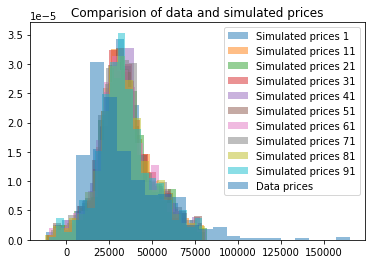

In [20]:
plt.figure()
for i in range(1, 100, 10):
    plt.hist(prices[i], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices {i}')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()